빈도수 인코딩 (fequency encoding) > fare 취소하고 모두 인코딩

사용 라이브러리 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import csv
import warnings 
warnings.filterwarnings('ignore')

### Dataset 확인

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.shape

(891, 12)

In [6]:
test = pd.read_csv('test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test.shape

(418, 11)

In [10]:
# train 결측값
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# test 결측값
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 데이터 전처리

Age -> 평균 29.69

In [12]:
train['Age'] = train['Age'].fillna(29.69)     # train
test['Age'] = test['Age'].fillna(29.69)   # test

Embarked -> 최빈값 S(0)

In [13]:
train['Embarked'] = train['Embarked'].fillna('S')

Fare -> 최빈값 8.05

In [14]:
fare = train['Fare']
fare.mode()

0    8.05
dtype: float64

In [15]:
test['Fare'] = test['Fare'].fillna(8.05)

#### 새 변수 생성

In [16]:
# age_gr / married / f_nm / f_ox / fare_gr

Age > Age_gr

In [17]:
def age_gr(x):
    if x < 5 :
       return 'very young'
    if 5<=x<10:
       return 'young'
    if 10<=x<16:
       return 'children'
    if 16<=x<20:
       return 's_adult'    # 16세~ 성인 간주 
    if 20<=x<30:
       return '20s'
    if 30<=x<40:
       return '30s'
    if 40<=x<50:
       return '40s'
    if 50<=x<60:
       return '50s'
    if 60<=x<70:
       return '60s'
    if 70<=x<80:
       return '70s'
    if 80<=x<90:
       return '80s'


In [18]:
train['Age_gr'] = train['Age'].apply(lambda x:age_gr(x))
test['Age_gr'] = test['Age'].apply(lambda x:age_gr(x))

f_nm

In [19]:
train['F_nm'] = train['SibSp'] + train['Parch']
test['F_nm'] = test['SibSp'] + test['Parch']

f_ox

In [20]:
def f_ox(x):
    if x == 0:
        return 0
    if x >= 1:
        return 1   

In [21]:
train['F_ox'] = train['F_nm'].apply(lambda x: f_ox(x))
test['F_ox'] = test['F_nm'].apply(lambda x: f_ox(x))

Name > Married

In [22]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,20s,1,1


In [23]:
train['Name'] = train['Name'].str.split(',').str[1]
train['Name'] = train['Name'].str.split('.').str[0]
train['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [24]:
n = [' Don',' Rev', ' Mme',' Mlle', ' Col', ' Capt', ' the Countess', ' Jonkgeer']

for i in n:
    print(train[train['Name']==i]['Name'])

# 총 14명 

30     Don
Name: Name, dtype: object
149     Rev
150     Rev
249     Rev
626     Rev
848     Rev
886     Rev
Name: Name, dtype: object
369     Mme
Name: Name, dtype: object
641     Mlle
710     Mlle
Name: Name, dtype: object
647     Col
694     Col
Name: Name, dtype: object
745     Capt
Name: Name, dtype: object
759     the Countess
Name: Name, dtype: object
Series([], Name: Name, dtype: object)


In [25]:
condition = train['Name']==' Rev'
train[condition]

#  구글 영어번역 검색 '신부님'
# 실제 최소 27세~ 의 남성, sibsp/parch가 0~1명, 2class(?)
# 미혼으로.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox
149,150,0,2,Rev,male,42.0,0,0,244310,13.000,NaN,S,40s,0,0
150,151,0,2,Rev,male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,50s,0,0
249,250,0,2,Rev,male,54.0,1,0,244252,26.000,NaN,S,50s,1,1
626,627,0,2,Rev,male,57.0,0,0,219533,12.350,NaN,Q,50s,0,0
848,849,0,2,Rev,male,28.0,0,1,248727,33.000,NaN,S,20s,1,1
886,887,0,2,Rev,male,27.0,0,0,211536,13.000,NaN,S,20s,0,0


In [26]:
# 미혼(0)
# Miss      미혼
# Master    미혼 남성(29살도 있음)
# Rev   신부님
# Mlle  미혼여성(마드모아젤) = Miss(프랑스 호)

# 기혼(1)
# Mr        기혼
# Mrs       기혼

In [27]:
# X 불명(9) -> 그 외.. 
# Don           도람뿌(남성형이름), 두목(?)
# Mme           N
# Col           N
# Capt          캡틴 1명, 기혼자임
# the Countess  백작부인(백작부인 자체는 직위인데 미/기혼 알 수X, 다만 이 사람은 이후에 결혼함)
# Jonkgeer      귀족직함 (가장 낮은 귀족직함) 결혼여부 불명
# Dr            박사
# Ms            기혼여부 상관없이
# Major         군대 직위
# Lady          당시 기혼자이나 귀족 출신 직위 중 1인듯함
# Sir           영국 준남작

In [28]:
test['Name'] = test['Name'].str.split(',').str[1]
test['Name'] = test['Name'].str.split('.').str[0]
test['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [29]:
my = [' Mr', ' Mrs']
mn = [' Miss', ' Master', ' Rev', ' Mlle']

train['Married'] = train['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)  
test['Married'] = test['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)      

#### 문자열 -> 숫자형으로 인코딩

In [30]:
# sex / embarked / age_gr

# 원핫인코딩, 레이블 인코딩을 꼭 해줘야 하나? 탑승항구 한 것처럼 하기에는 좀 그런가..
# 원핫 인코딩으로 해주어야 하나? 
# 상관관계 산점도가 잘 안 보이는 느낌 

In [31]:
# 빈도수 인코딩
col = ['Pclass', 'Sex', 'Fare', 'Embarked' 'Age_gr', 'F_nm', 'F_ox', 'Married']


Pclass= (train.groupby('Pclass').size()/len(train)).round(3)
train.loc[:, 'pclass_encode'] = train['Pclass'].map(Pclass)
test.loc[:, 'pclass_encode'] = test['Pclass'].map(Pclass)

Sex= (train.groupby('Sex').size()/len(train)).round(3)
train.loc[:, 'Sex_encode'] = train['Sex'].map(Sex)
test.loc[:, 'Sex_encode'] = test['Sex'].map(Sex)

Fare= (train.groupby('Fare').size()/len(train)).round(3)
train.loc[:, 'Fare_encode'] = train['Fare'].map(Fare)
test.loc[:, 'Fare_encode'] = test['Fare'].map(Fare)

Embarked= (train.groupby('Embarked').size()/len(train)).round(3)
train.loc[:, 'Embarked_encode'] = train['Embarked'].map(Embarked)
test.loc[:, 'Embarked_encode'] = test['Embarked'].map(Embarked)

Age_gr= (train.groupby('Age_gr').size()/len(train)).round(3)
train.loc[:, 'Age_gr_encode'] = train['Age_gr'].map(Age_gr)
test.loc[:, 'Age_gr_encode'] = test['Age_gr'].map(Age_gr)

F_nm= (train.groupby('F_nm').size()/len(train)).round(3)
train.loc[:, 'F_nm_encode'] = train['F_nm'].map(F_nm)
test.loc[:, 'F_nm_encode'] = test['F_nm'].map(F_nm)

F_ox= (train.groupby('F_ox').size()/len(train)).round(3)
train.loc[:, 'F_ox_encode'] = train['F_ox'].map(F_ox)
test.loc[:, 'F_ox_encode'] = test['F_ox'].map(F_ox)

Married= (train.groupby('Married').size()/len(train)).round(3)
train.loc[:, 'Married_encode'] = train['Married'].map(Married)
test.loc[:, 'Married_encode'] = test['Married'].map(Married)

train.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,F_ox,Married,pclass_encode,Sex_encode,Fare_encode,Embarked_encode,Age_gr_encode,F_nm_encode,F_ox_encode,Married_encode
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,...,1,0,0.551,0.648,0.015,0.725,0.446,0.181,0.397,0.721
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,...,1,0,0.242,0.352,0.001,0.189,0.187,0.181,0.397,0.721
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0.551,0.352,0.020,0.725,0.446,0.603,0.603,0.258
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,...,1,0,0.242,0.352,0.006,0.725,0.187,0.181,0.397,0.721
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,...,0,0,0.551,0.648,0.048,0.725,0.187,0.603,0.603,0.721


In [32]:
stop

NameError: name 'stop' is not defined

#### 필요없는 변수 drop

In [33]:
# cabin, ticket, Name, Age, SibSp, Parch

train = train.drop(['PassengerId', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Age_gr','F_nm', 'F_ox','Married','SibSp', 'Parch', 'Cabin', 'Ticket', 'Name','Age'], axis=1)
test = test.drop(['Pclass', 'Sex', 'Fare', 'Embarked', 'Age_gr','F_nm', 'F_ox','Married','SibSp', 'Parch', 'Cabin', 'Ticket', 'Name','Age'], axis=1)

In [34]:
train.head()

,Survived,pclass_encode,Sex_encode,Fare_encode,Embarked_encode,Age_gr_encode,F_nm_encode,F_ox_encode,Married_encode
0,0,0.551,0.648,0.015,0.725,0.446,0.181,0.397,0.721
1,1,0.242,0.352,0.001,0.189,0.187,0.181,0.397,0.721
2,1,0.551,0.352,0.020,0.725,0.446,0.603,0.603,0.258
3,1,0.242,0.352,0.006,0.725,0.187,0.181,0.397,0.721
4,0,0.551,0.648,0.048,0.725,0.187,0.603,0.603,0.721


In [35]:
test.head()

,PassengerId,pclass_encode,Sex_encode,Fare_encode,Embarked_encode,Age_gr_encode,F_nm_encode,F_ox_encode,Married_encode
0,892,0.551,0.648,0.002,0.086,0.187,0.603,0.603,0.721
1,893,0.551,0.352,NaN,0.725,0.100,0.181,0.397,0.721
2,894,0.207,0.648,NaN,0.086,0.021,0.603,0.603,0.721
3,895,0.551,0.648,0.015,0.725,0.446,0.603,0.603,0.721
4,896,0.551,0.352,0.001,0.725,0.446,0.114,0.397,0.721


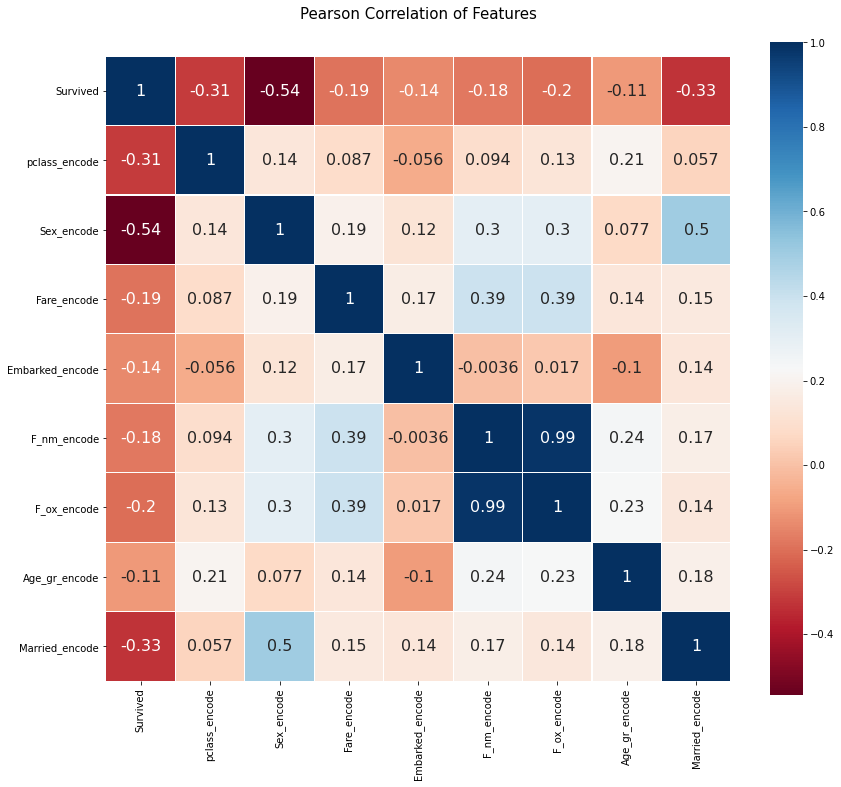

In [36]:
import seaborn as sns
heatmap_data = train[['Survived', 'pclass_encode', 'Sex_encode', 'Fare_encode', 'Embarked_encode', 'F_nm_encode', 'F_ox_encode', 'Age_gr_encode', 'Married_encode']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

#### 변수 간 관계

In [ ]:
# sns.pairplot(train,diag_kind='hist')
# plt.show()

In [ ]:
# import warnings 
# warnings.filterwarnings('ignore')

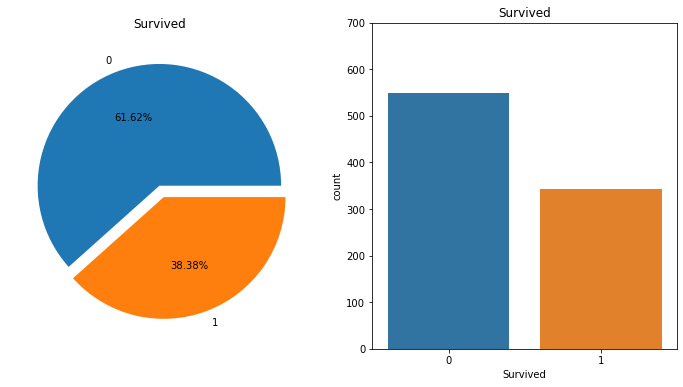

In [ ]:
# f,ax=plt.subplots(1,2,figsize=(12,6))

# train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
# ax[0].set_title('Survived')
# ax[0].set_ylabel('')

# sns.countplot('Survived',data=train,ax=ax[1])
# ax[1].set_title('Survived')
# plt.ylim(0,700)
# plt.show()

[Text(0.5, 1.0, 'Fare')]

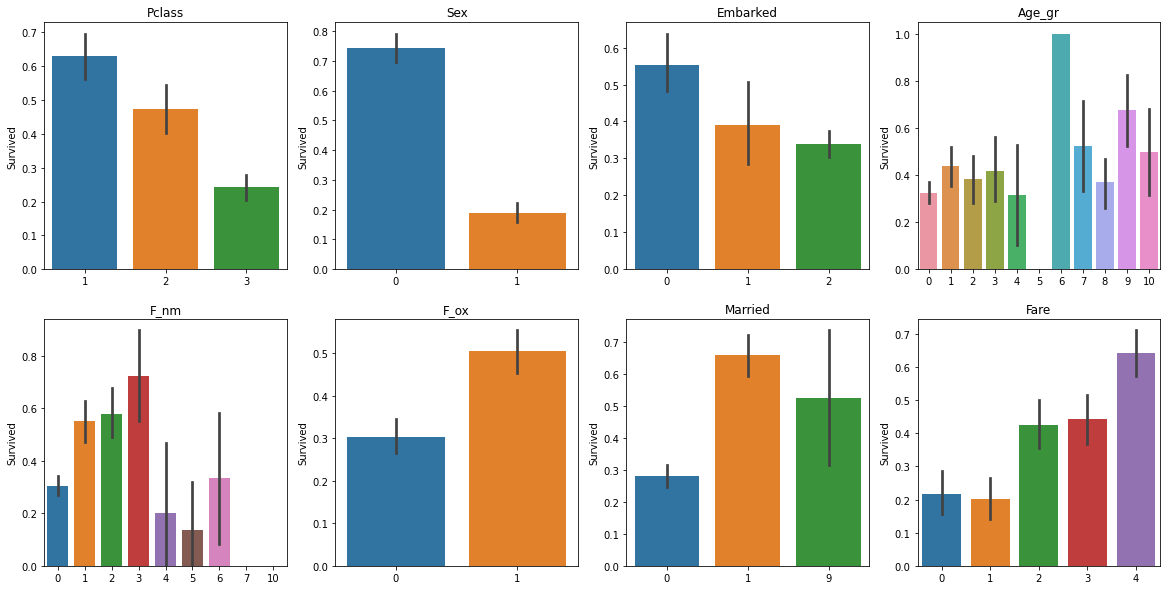

In [ ]:
# # 변수별 평균 생존률

# fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
# fig.set_size_inches(20,10)

# sns.barplot(x='Pclass', y='Survived',data= train, ax=ax1)
# sns.barplot(x='Sex', y='Survived',data= train, ax=ax2)
# sns.barplot(x='Embarked', y='Survived',data= train, ax=ax3)
# sns.barplot(x='Age_gr', y='Survived',data= train, ax=ax4)
# sns.barplot(x='F_nm', y='Survived',data= train, ax=ax5)
# sns.barplot(x='F_ox', y='Survived',data= train, ax=ax6)
# sns.barplot(x='Married', y='Survived',data= train, ax=ax7)
# sns.barplot(x='Fare', y='Survived', data= train, ax=ax8)

# ax1.set(xlabel='')
# ax2.set(xlabel='')
# ax3.set(xlabel='')
# ax4.set(xlabel='')
# ax5.set(xlabel='')
# ax6.set(xlabel='')
# ax7.set(xlabel='')
# ax8.set(xlabel='')

# ax1.set(title="Pclass")
# ax2.set(title="Sex")
# ax3.set(title="Embarked")
# ax4.set(title="Age_gr")
# ax5.set(title="F_nm")
# ax6.set(title="F_ox")
# ax7.set(title="Married")
# ax8.set(title='Fare')



In [ ]:
# sharey=True : y축 동일화 

#### 분류 모델

In [37]:
train['Survived'].unique()

array([0, 1], dtype=int64)

train, test split

In [38]:
X = train.iloc[:,1:].values
y = train['Survived']
X.shape, y.shape

((891, 8), (891,))

In [ ]:
# pip install xgboost

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [40]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [41]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree
76315

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

In [ ]:
stop 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=2021)
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2021,
 'verbose': 0,
 'warm_start': False}

In [ ]:
params = {
    'n_estimators': [130],
    'max_depth': [2,3,5,10],
    'min_samples_leaf' :[1,5,8],
    'min_samples_split' : [2,3,5]
}
# n_estimator = 100
# max sample/ max feature 

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_rfc = GridSearchCV(rfc, param_grid=params, scoring ='accuracy', cv=5 )
grid_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2021),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [130]},
             scoring='accuracy')

In [ ]:
# 땅!

In [ ]:
# 1
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 130}
0.8283033080158182


In [ ]:
best_clf = grid_rfc.best_estimator_

In [ ]:
Y_pred = best_clf.predict(test.iloc[:,1:])
# np.arr 형태

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('12.3.csv', index=False)

In [ ]:
# xgb = XGBClassifier()
# xgb.fit(X_train, Y_train)
# Y_pred = xgb.predict(X_test)
# xgb.score(X_train, Y_train)
# acc_xgb = round(xgb.score(X_train, Y_train) * 100, 2)
# acc_xgb
# # 77751

[10:09:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


90.35

In [ ]:
# submission = pd.DataFrame({
#         "PassengerId": test["PassengerId"],
#         "Survived": Y_pred
#     })
# submission.to_csv('6r.csv', index=False)

In [ ]:
# 12. 파라미터 튜닝 
# fare qcut 범주화 
# {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 130}
# rfc 82.83 / 78947 > fix

# 15. 빈도수 인코딩 (Fare부터 다시 1.ipynb~)
# 빈도에 따른 데이터도 아니고, 실수 값 데이터로 모델링을 할 수 도 없다! 
